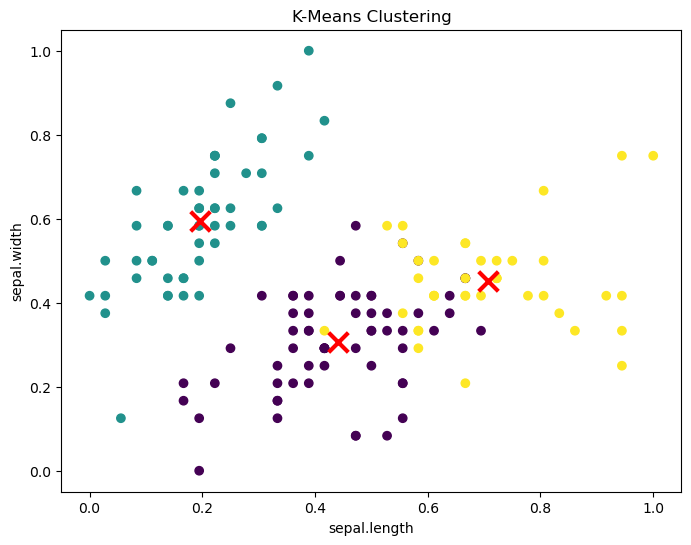

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Загрузка данных
def load_iris():
    df = pd.read_csv("iris.csv")
    features = ["sepal.length", "sepal.width", "petal.length", "petal.width"]
    X = df[features].values
    return X

# Реализация k-means
def k_means(X, k, max_iters=100):
    # Инициализация случайных центроидов
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # Вычисление расстояний до центроидов
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Определение ближайших центроидов
        labels = np.argmin(distances, axis=0)
        
        # Обновление центроидов
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Проверка сходимости
        if np.all(centroids == new_centroids):
            break
            
        centroids = new_centroids
    
    return centroids, labels

X = load_iris()

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Применение k-means
np.random.seed(42)
centroids, labels = k_means(X_scaled, k=3)

# Визуализация результатов (используем первые два признака)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.title('K-Means Clustering')
plt.show()
